In [2]:
import math
import torch
import gpytorch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import GPE_ensemble as GPE

import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#from GPErks.gp.data.dataset import Dataset
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.means import LinearMean
from gpytorch.kernels import RBFKernel, ScaleKernel
from torchmetrics import MeanSquaredError, R2Score
#from GPErks.gp.experiment import GPExperiment
#from GPErks.train.emulator import GPEmulator
#from GPErks.perks.inference import Inference
#from GPErks.train.early_stop import NoEarlyStoppingCriterion
#from GPErks.train.early_stop import (
#    GLEarlyStoppingCriterion,
#    PQEarlyStoppingCriterion,
#    UPEarlyStoppingCriterion,
#)
#from GPErks.train.early_stop import PkEarlyStoppingCriterion



%matplotlib inline
%load_ext autoreload
%autoreload 2

# set logger and enforce reproducibility
#from GPErks.log.logger import get_logger
#from GPErks.utils.random import set_seed
#log = get_logger()
seed = 7
#set_seed(seed)
from time import process_time 
import scipy
from scipy.optimize import minimize

In [3]:
mode_weights = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/modes_weights.csv',index_col=0,delim_whitespace=False,header=0)

mode_weights

mode_weights=mode_weights.drop(15,axis=0)
#mode_weights=mode_weights.drop(14,axis=0)

meshes=['01','02','03','04','05','06','07','08','09','10','11','12','13','14','16','17','18','19']

x_labels=pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/input/xlabels_EP.txt',delim_whitespace=True,header=None)
x_labels=x_labels.values.flatten().tolist()+mode_weights.columns.tolist()

y_labels=pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/output/ylabels.txt',delim_whitespace=True,header=None)



all_input = []
all_output=[]
all_x=[]
for i in range(len(meshes)):
    val=meshes[i]
    
    inputData = pd.read_csv("/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/"+val+"/X_EP.txt",index_col=None,delim_whitespace=True,header=None).values
    outputData = pd.read_csv("/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/"+val+"/Y.txt",index_col=None,delim_whitespace=True,header=None).values
    modeweights = np.tile(mode_weights.iloc[i,:].values, (inputData.shape[0],1))
    input_modes = np.concatenate((inputData,modeweights),axis=1)
    all_x.append(torch.tensor(inputData))
    all_input.append(torch.tensor(input_modes))
    all_output.append(torch.tensor(outputData))
    print(val)
    print(np.max(outputData))
#all_input=pd.concat(all_input)
#all_output=pd.concat(all_output
#all_input.columns=x_labels
#all_output.columns=y_labels

01
406.703
02
317.407
03
332.914
04
309.14
05
277.849
06
296.377
07
355.546
08
283.103
09
391.145
10
439.316
11
348.01
12
292.465
13
301.222
14
325.678
16
297.968
17
317.709
18
297.346
19
312.492


In [4]:
emulator=GPE.ensemble(all_x[0],all_output[0])

0
1


In [5]:
len(meshes)

18

# Emulator per mesh

In [6]:
reps = 10

R2 = torch.zeros(len(meshes),reps,2)

for i in range(len(meshes)):
    for j in range(reps):
        X=all_x[i]
        y=all_output[i]
        X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size=0.2,
            random_state=j
        )
        emulator=GPE.ensemble(X_train,y_train,mean_func="linear",training_iter=1000)
        R2[i,j,:]=emulator.R2(X_test,y_test)

0
1


/Users/pmzcwl/Documents/GitHub/Calibration/GPE_ensemble.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  R2_score=1-self.MSE(inputVals,outputVals)/torch.tensor(torch.var(outputVals,axis=0))


0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [7]:
emulator.R2(X_test,y_test)

tensor([0.9996, 0.9996], dtype=torch.float64, grad_fn=<RsubBackward1>)

In [8]:
R2[0].shape

torch.Size([10, 2])

In [9]:
R2.mean(axis=1).shape

torch.Size([18, 2])

In [10]:
len(meshes)

18

In [11]:
R2.mean(axis=1).detach().numpy().shape

(18, 2)

Text(0, 0.5, '$R^2$')

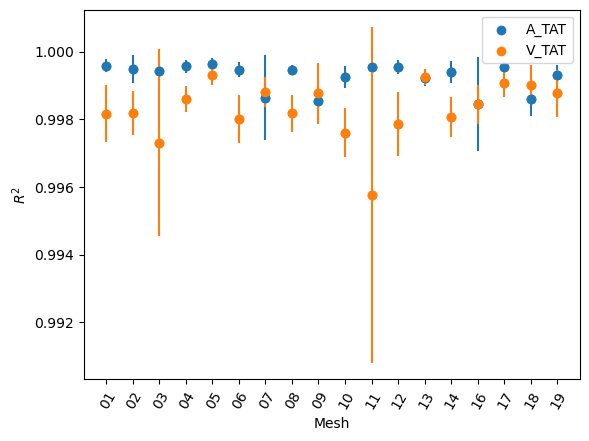

In [12]:
fig, ax = plt.subplots()


ax.scatter(meshes,R2.mean(axis=1)[:,0].detach().numpy())
plt.errorbar(meshes,R2.mean(axis=1)[:,0].detach().numpy(),fmt='o',yerr=R2.std(axis=1)[:,0].detach().numpy())
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

ax.scatter(meshes,R2.mean(axis=1)[:,1].detach().numpy())
plt.errorbar(meshes,R2.mean(axis=1)[:,1].detach().numpy(),fmt='o',yerr=R2.std(axis=1)[:,1].detach().numpy())
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

plt.legend(('A_TAT','V_TAT'))
plt.xlabel('Mesh')
plt.ylabel('$R^2$')

# Emulator trained on 277 individual meshes

In [ ]:
new_mode_weights = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/shape_EP/X_shape.txt',delim_whitespace=True,header=None)

new_EP = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/shape_EP/X_EP.txt',delim_whitespace=True,header=None)

new_Y = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/shape_EP/Y.txt',delim_whitespace=True,header=None)

new_X = pd.DataFrame(np.concatenate((new_EP,new_mode_weights),axis=1))

x_labels

new_X.columns=x_labels[0:15]
new_Y.columns=y_labels

# convert all columns to numeric format
new_Y = new_Y.apply(pd.to_numeric, errors='coerce')

# identify non-numeric rows
non_numeric_rows = new_Y.isnull().any(axis=1)
non_numeric_rows=non_numeric_rows[non_numeric_rows==1]

non_numeric_rows.index

new_Y=new_Y.drop(non_numeric_rows.index)

new_X=new_X.drop(non_numeric_rows.index)

In [ ]:

t_size = np.linspace(18,162,9)
R2 = torch.zeros(t_size.shape[0],reps,2)
for i in range(t_size.shape[0]):
    for j in range(reps):
        X=torch.tensor(new_X.values)
        y=torch.tensor(new_Y.values)
        X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size=int(180-t_size[i]),
            random_state=j
        )
        emulator=GPE.ensemble(X_train,y_train,mean_func="linear",training_iter=1000)
        R2[i,j,:] =emulator.R2(X_test,y_test)

In [ ]:
fig, ax = plt.subplots()


#plt.plot(t_size,R2.mean(axis=1).detach().numpy())
plt.errorbar(t_size,R2.mean(axis=1)[:,0].detach().numpy(),fmt='o',yerr=R2.std(axis=1)[:,0].detach().numpy())
plt.errorbar(t_size,R2.mean(axis=1)[:,1].detach().numpy(),fmt='o',yerr=R2.std(axis=1)[:,1].detach().numpy())
plt.legend(('A_TAT','V_TAT'))
plt.xlabel('Training set size')
plt.ylabel('$R^2$')

# Emulator trained with 17/18 meshes and evaluated on the left out mesh

In [ ]:
torch.cat(all_input)[:,0:15]

In [ ]:
all_input[:0]+all_input[1:]

In [ ]:
reps = 10

R2_test = torch.zeros(len(meshes),reps,2)
R2_leftout= torch.zeros(len(meshes),reps,2)
for i in range(len(meshes)):
    for j in range(reps):
        X=torch.cat(all_input[:i]+all_input[i+1:])
        y=torch.cat(all_output[:i]+all_output[i+1:])
        X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size=0.8,
            random_state=j
        )
        emulator=GPE.ensemble(X_train,y_train,mean_func="linear",training_iter=1000)
        R2_test[i,j,:]=emulator.R2(X_test,y_test)
        R2_leftout[i,j,:] = emulator.R2(all_input[i],all_output[i])

# Discrepancy

In [ ]:
x_labels=pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/input/xlabels_EP.txt',delim_whitespace=True,header=None)

y_labels=pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/output/ylabels.txt',delim_whitespace=True,header=None)

y_labels

inputData_0 = pd.read_csv("/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/01/X_EP.txt",index_col=None,delim_whitespace=True,header=None).values
outputData_0 = pd.read_csv("/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/01/Y.txt",index_col=None,delim_whitespace=True,header=None).values

inputData_1 = pd.read_csv("/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/02/X_EP.txt",index_col=None,delim_whitespace=True,header=None).values
outputData_1 = pd.read_csv("/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/02/Y.txt",index_col=None,delim_whitespace=True,header=None).values

X0 = torch.tensor(inputData_0)
Y0 = torch.tensor(outputData_0)

X1 = torch.tensor(inputData_1)
Y1 = torch.tensor(outputData_1)



emulator_0 = GPE.ensemble(X0,Y0,mean_func="constant",training_iter=0)

for param in emulator_0.models[0].named_parameters():
    print(f' value = {param}')

emulator_0 = GPE.ensemble(X0,Y0,mean_func="linear",training_iter=0)

for param in emulator_0.models[0].named_parameters():
    print(f' value = {param}')

# split original dataset in training, validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X1,
    Y1,
    test_size=0.1,
    random_state=seed
)

X_test.shape[1]

a=np.random.choice(range(X_train.shape[0]),18,replace=False)

X_train

X_train.shape

m0 = emulator_0.predict(X_train[a])

y_adjust = torch.tensor(y_train[a] - m0)

delta_1 = GPE.ensemble(X_train[a],y_adjust,mean_func="linear",training_iter=500)

np.sqrt(((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())

1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-y_test)**2).mean(axis=0)/y_test.var(axis=0)



p = int(X1.shape[0]*0.05)
n = int(X_train.shape[0]/p)
reps = 10
MSE = np.zeros((n,reps,2))
R2 = np.zeros((n,reps,2))
MSE_p = np.zeros((n,reps,2))
R2_p = np.zeros((n,reps,2))
for i in range(n):
    for j in range(reps):
        a=np.random.choice(range(X_train.shape[0]),(i+1)*p,replace=False)
        m0 = emulator_0.predict(X_train[a,:])
        y_adjust = torch.tensor(y_train[a] - m0)
        delta_1 = GPE.ensemble(X_train[a,:],y_adjust,mean_func="linear",training_iter=500)
        MSE[i,j] += np.sqrt(((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test))**2).mean(axis=0).detach().numpy())
        R2[i,j] += (1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-y_test)**2).mean(axis=0)/y_test.var(axis=0)).detach().numpy()
        
        delta_1p = GPE.ensemble(X_train[a,:],y_train[a],mean_func="linear",training_iter=500)
        MSE_p[i,j] += delta_1p.MSE(X_test,y_test).detach().numpy()
        R2_p[i,j] += delta_1p.R2(X_test,y_test).detach().numpy()

x = np.linspace(9,162,18)

x

MSE.mean(axis=1)[0]

MSE

plt.plot(x,MSE.mean(axis=1))
plt.fill_between(x, MSE.mean(axis=1)[:,0]+MSE.std(axis=1)[:,0], y2=MSE.mean(axis=1)[:,0]-MSE.std(axis=1)[:,0],alpha=0.4)
plt.fill_between(x, MSE.mean(axis=1)[:,1]+MSE.std(axis=1)[:,1], y2=MSE.mean(axis=1)[:,1]-MSE.std(axis=1)[:,1],alpha=0.4)
plt.legend(y_labels.values)

plt.ylabel('MSE')
plt.xlabel('$m$')
#plt.yscale('log')



In [ ]:
1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-y_test)**2).mean(axis=0)

In [ ]:
MSE.mean(axis=1)[:,0]+MSE.std(axis=1)[:,0]

MSE.mean(axis=1)[:,0]-MSE.std(axis=1)[:,0]

delta_1p.MSE(X_test,y_test)/reps

plt.plot(x,MSE.mean(axis=1),'o') 
plt.legend(y_labels.values)

plt.ylabel('MSE')
plt.xlabel('$m$')
plt.yscale('log')

np.hstack((MSE_p,MSE))

MSE_p.mean(axis=1)[:,0]+MSE_p.std(axis=1)[:,0]

MSE_p



In [ ]:
plt.plot(x[1:],np.hstack((MSE.mean(axis=1),MSE_p.mean(axis=1)))[1:,[0,2]],'o') 
plt.fill_between(x[1:], MSE.mean(axis=1)[1:,0]+MSE.std(axis=1)[1:,0], y2=MSE.mean(axis=1)[1:,0]-MSE.std(axis=1)[1:,0],alpha=0.4)
plt.fill_between(x[1:], MSE_p.mean(axis=1)[1:,0]+MSE_p.std(axis=1)[1:,0], y2=MSE_p.mean(axis=1)[1:,0]-MSE_p.std(axis=1)[1:,0],alpha=0.4)
plt.legend(['$\delta_1$','$f_1$'])
plt.ylabel('MSE')
plt.xlabel('$m$')
plt.yscale('log')



In [ ]:
plt.plot(x,np.hstack((MSE.mean(axis=1),MSE_p.mean(axis=1)))[:,[1,3]],'o') 
plt.fill_between(x[1:], MSE.mean(axis=1)[1:,1]+MSE.std(axis=1)[1:,1], y2=MSE.mean(axis=1)[1:,1]-MSE.std(axis=1)[1:,1],alpha=0.4)
plt.fill_between(x[1:], MSE_p.mean(axis=1)[1:,1]+MSE_p.std(axis=1)[1:,1], y2=MSE_p.mean(axis=1)[1:,1]-MSE_p.std(axis=1)[1:,1],alpha=0.4)
plt.legend(['$\delta_1$','$f_1$'])
plt.ylabel('MSE')
plt.xlabel('$m$')
plt.yscale('log')



In [ ]:
plt.plot(x,np.hstack((R2.mean(axis=1),R2_p.mean(axis=1)))[:,[0,2]],'o') 
plt.legend(['$\delta_1$','$f_1$'])
plt.ylabel('MSE')
plt.xlabel('$m$')



In [ ]:
plt.plot(x,np.hstack((R2.mean(axis=1),R2_p.mean(axis=1)))[:,[1,3]],'o') 
plt.legend(['$\delta_1$','$f_1$'])
plt.ylabel('MSE')
plt.xlabel('$m$')



In [ ]:
plt.plot(x,MSE_p.mean(axis=1)-MSE.mean(axis=1),'o')




In [ ]:
plt.plot(x,R2_p.mean(axis=1)-R2.mean(axis=1),'o')
plt.legend(y_labels.values)
plt.ylabel('$R^2$')
plt.xlabel('$m$')



In [ ]:
MSE_p

R2_p-R2

plt.plot(x,R2.mean(axis=1),'o')
plt.legend(y_labels.values)
plt.ylabel('$R^2$')
plt.xlabel('$m$')



In [ ]:
p

#b=np.random.choice(range(X_train.shape[0]),18,replace=False)
p = int(X0.shape[0]*0.05)
n = int(X0.shape[0]/p)
m = 18
MSE = np.zeros((n,m,2))
R2 = np.zeros((n,m,2))
reps = 5
for i in range(n):
    for k in range(m):
        for j in range(reps):
            b=np.random.choice(range(X_train.shape[0]),(k+1)*p,replace=False)
            a=np.random.choice(range(X0.shape[0]),(i+1)*p,replace=False)
            emulator_0 = GPE.ensemble(X0.iloc[a,:],Y0.iloc[a,:],mean_func="linear",training_iter=500)
            m0 = emulator_0.predict(X_train.iloc[b,:])
            y_adjust = pd.DataFrame((torch.tensor(y_train.iloc[b].values) - m0).detach().numpy())
            delta_1 = GPE.ensemble(X_train.iloc[b,:],y_adjust,mean_func="linear",training_iter=500)
            MSE[i,k] += np.sqrt(((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test.values))**2).mean(axis=0).detach().numpy())/reps
            R2[i,k] += (1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test.values))**2).mean(axis=0)/torch.tensor(np.var(y_test.values,axis=0))).detach().numpy()/reps

x

y = np.linspace(9,180,20)

y

xx,yy=np.meshgrid(x,y)

xx[1:,1:].shape

level = 1

plt.contourf(xx[level:,level:],yy[level:,level:],MSE[level:,level:,1],origin='lower',levels=50)
plt.ylabel('n')
plt.xlabel('m')
plt.colorbar()



In [ ]:
plt.contourf(xx[level:,level:],yy[level:,level:],R2[level:,level:,1],origin='lower',levels=50,cmap='plasma')
plt.ylabel('n')
plt.xlabel('m')
plt.colorbar()

plt.plot(MSE) 
plt.legend(y_labels.values)
plt.ylabel('MSE')
plt.xlabel('$n$')



In [ ]:
plt.plot(R2)
plt.legend(y_labels.values)
plt.ylabel('$R^2$')
plt.xlabel('$n$')



In [ ]:
meshes=['01','02','03','04','05','06','07','08','09','10','11','12','13','14','16','17','18','19']

meshes.copy

t_size = 36
reps = 5
MSE = np.zeros((len(meshes),len(meshes)-1,2))
R2 = np.zeros((len(meshes),len(meshes)-1,2))
for i in (range(len(meshes))):
    val0 = meshes[i]
    
    meshes2 = meshes.copy()
    meshes2.remove(meshes[i])
    
    inputData_0 = pd.read_csv("/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/"+val0+"/X_EP.txt",index_col=None,delim_whitespace=True,header=None).values
    outputData_0 = pd.read_csv("/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/"+val0+"/Y.txt",index_col=None,delim_whitespace=True,header=None).values
    
    X0 = pd.DataFrame(inputData_0)
    Y0 = pd.DataFrame(outputData_0)
    X0.columns = x_labels
    Y0.columns = y_labels
    emulator_0 = GPE.ensemble(X0,Y0,mean_func="linear",training_iter=500)

    
    
    for j in (range(len(meshes)-1)):
        val1 = meshes2[j]
        inputData_1 = pd.read_csv("/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/"+val1+"/X_EP.txt",index_col=None,delim_whitespace=True,header=None).values
        outputData_1 = pd.read_csv("/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP_healthy/"+val1+"/Y.txt",index_col=None,delim_whitespace=True,header=None).values

        X1 = pd.DataFrame(inputData_1)
        Y1 = pd.DataFrame(outputData_1)
        X1.columns = x_labels
        Y1.columns = y_labels
        # split original dataset in training, validation and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X1,
            Y1,
            test_size=0.1,
            random_state=seed
        )
        for k in range(reps):
            a=np.random.choice(range(X_train.shape[0]),t_size,replace=False)
            m0 = emulator_0.predict(X_train.iloc[a,:])
            y_adjust = pd.DataFrame((torch.tensor(y_train.iloc[a].values) - m0).detach().numpy())
            delta_1 = GPE.ensemble(X_train.iloc[a,:],y_adjust,mean_func="linear",training_iter=500)
            MSE[i,j,:] += np.sqrt(((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test.values))**2).mean(axis=0).detach().numpy())/reps
            R2[i,j,:] += (1-((emulator_0.predict(X_test)+delta_1.predict(X_test)-torch.tensor(y_test.values))**2).mean(axis=0)/torch.tensor(np.var(y_test.values,axis=0))).detach().numpy()/reps

MSE

MSE.mean(axis=1)

plt.plot(MSE.mean(axis=1),'o')
plt.xticks(range(len(meshes)),meshes)
plt.ylabel('MSE')
plt.xlabel('Mesh')



In [ ]:
y_labels

plt.plot(R2.mean(axis=1),'o')
plt.xticks(range(len(meshes)),meshes)
plt.ylabel('$R^2$')
plt.xlabel('$m$')
plt.legend(y_labels)



In [ ]:
nDim = X_train.shape[1]
boundsMaxMin = []
for i in range(nDim):
    boundsMaxMin.append([np.min(X_train.iloc[:,i]),np.max(X_train.iloc[:,i])])
    print(boundsMaxMin[i])

##### from SALib.sample import saltelli
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

# Define the model inputs
problem = {
    'num_vars': nDim,
    'names': x_labels,
    'bounds': boundsMaxMin
    #'bounds': [[-1, 1],
     #          [-1, 1],
      #         [-1, 1],
       #        [-1, 1],
        #       [-1, 1],
         #      [-1, 1],
          #     [-1, 1],
           #    [-1, 1],
            #   [-1,1]]
}

# Generate samples
param_values = saltelli.sample(problem, 1024)

data1 = pd.DataFrame(param_values,columns=x_labels)

data1

Ymean_A=delta_1.predict(data1)

Si = []
for i in range(2):
    Si.append(sobol.analyze(problem, Ymean_A[:,i].detach().numpy(), print_to_console=True))

nMod = 2
SiA_first=np.zeros((nDim,nMod))
SiA_total=np.zeros((nDim,nMod))

for i in range(nMod):
    total_Si, first_Si, second_Si = Si[i].to_df()
    SiA_first[:,i] =  first_Si.iloc[:,0]
    SiA_total[:,i] =  total_Si.iloc[:,0]


inputs = x_labels.values.tolist()
outputs = y_labels.values.tolist()
fig, ax = plt.subplots()
im = ax.imshow(SiA_first.T,cmap='magma_r',vmin=0,vmax=1)

ax.set_yticks(np.arange(len(outputs)),labels=outputs)
ax.set_xticks(np.arange(len(inputs)), labels=inputs)
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

plt.colorbar(im,fraction=0.015, pad=0.04)